In [ ]:
# -- Import required packages
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# -- Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# -- Reading the file
file = "/content/drive/MyDrive/ACSST5Y2016.S1903-Data.csv"
df_csv= pd.read_csv(file, skiprows = 1)

In [ ]:
# -- checking data
df_csv.head(10)

,Geography,Geographic Area Name,Total!!Estimate!!Households,Total!!Margin of Error!!Households,Median income (dollars)!!Estimate!!Households,Median income (dollars)!!Margin of Error!!Households,Total!!Estimate!!Households!!One race!!White,Total!!Margin of Error!!Households!!One race!!White,Median income (dollars)!!Estimate!!Households!!One race!!White,Median income (dollars)!!Margin of Error!!Households!!One race!!White,...,Median income (dollars)!!Margin of Error!!PERCENT ALLOCATED!!Household income in the past 12 months,Total!!Estimate!!PERCENT ALLOCATED!!Family income in the past 12 months,Total!!Margin of Error!!PERCENT ALLOCATED!!Family income in the past 12 months,Median income (dollars)!!Estimate!!PERCENT ALLOCATED!!Family income in the past 12 months,Median income (dollars)!!Margin of Error!!PERCENT ALLOCATED!!Family income in the past 12 months,Total!!Estimate!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Total!!Margin of Error!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Median income (dollars)!!Estimate!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Median income (dollars)!!Margin of Error!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Unnamed: 122
0,0100000US,United States,117716237,222078,55322,120,77.3,0.1,59083,134,...,(X),33.0,(X),(X),(X),29.7,(X),(X),(X),NaN
1,0500000US01001,"Autauga County, Alabama",20800,391,53099,2631,79.7,1.2,58864,3944,...,(X),28.5,(X),(X),(X),29.5,(X),(X),(X),NaN
2,0500000US01003,"Baldwin County, Alabama",75149,1285,51365,991,89.4,0.8,53816,1216,...,(X),34.0,(X),(X),(X),28.2,(X),(X),(X),NaN
3,0500000US01005,"Barbour County, Alabama",9122,286,33956,2655,51.7,1.8,46410,3757,...,(X),38.1,(X),(X),(X),26.9,(X),(X),(X),NaN
4,0500000US01007,"Bibb County, Alabama",7048,352,39776,3306,83.9,2.0,42054,3789,...,(X),45.8,(X),(X),(X),38.8,(X),(X),(X),NaN
5,0500000US01009,"Blount County, Alabama",20619,403,46212,2443,96.4,0.7,46879,2468,...,(X),31.3,(X),(X),(X),26.8,(X),(X),(X),NaN
6,0500000US01011,"Bullock County, Alabama",3556,210,29335,5435,23.2,3.4,52036,9953,...,(X),44.0,(X),(X),(X),45.8,(X),(X),(X),NaN
7,0500000US01013,"Butler County, Alabama",7675,251,34315,2904,56.4,1.7,43819,4991,...,(X),36.6,(X),(X),(X),38.4,(X),(X),(X),NaN
8,0500000US01015,"Calhoun County, Alabama",45071,581,41954,1381,76.0,0.8,46992,2313,...,(X),33.4,(X),(X),(X),30.1,(X),(X),(X),NaN
9,0500000US01017,"Chambers County, Alabama",13851,359,36027,1870,58.3,1.4,42628,4316,...,(X),38.7,(X),(X),(X),31.2,(X),(X),(X),NaN


In [ ]:
# -- seeing column names
df_csv.columns

Index(['Geography', 'Geographic Area Name', 'Total!!Estimate!!Households',
       'Total!!Margin of Error!!Households',
       'Median income (dollars)!!Estimate!!Households',
       'Median income (dollars)!!Margin of Error!!Households',
       'Total!!Estimate!!Households!!One race!!White',
       'Total!!Margin of Error!!Households!!One race!!White',
       'Median income (dollars)!!Estimate!!Households!!One race!!White',
       'Median income (dollars)!!Margin of Error!!Households!!One race!!White',
       ...
       'Median income (dollars)!!Margin of Error!!PERCENT ALLOCATED!!Household income in the past 12 months',
       'Total!!Estimate!!PERCENT ALLOCATED!!Family income in the past 12 months',
       'Total!!Margin of Error!!PERCENT ALLOCATED!!Family income in the past 12 months',
       'Median income (dollars)!!Estimate!!PERCENT ALLOCATED!!Family income in the past 12 months',
       'Median income (dollars)!!Margin of Error!!PERCENT ALLOCATED!!Family income in the past 12 m

In [ ]:
# -- Taking the useful columns for our process
Geo = ["Geography", "Geographic Area Name"]
df_csv = df_csv[Geo]

In [ ]:
# -- checking it is done or not
df_csv.columns

Index(['Geography', 'Geographic Area Name'], dtype='object')

In [ ]:
# -- seeing results
df_csv.head(10)

,Geography,Geographic Area Name
0,0100000US,United States
1,0500000US01001,"Autauga County, Alabama"
2,0500000US01003,"Baldwin County, Alabama"
3,0500000US01005,"Barbour County, Alabama"
4,0500000US01007,"Bibb County, Alabama"
5,0500000US01009,"Blount County, Alabama"
6,0500000US01011,"Bullock County, Alabama"
7,0500000US01013,"Butler County, Alabama"
8,0500000US01015,"Calhoun County, Alabama"
9,0500000US01017,"Chambers County, Alabama"


In [ ]:
# Drop the row where 'Geography' is '0100000US'
df_csv = df_csv[df_csv['Geography'] != '0100000US']

# Print the modified DataFrame to verify the row has been dropped
print(df_csv.head())


        Geography     Geographic Area Name
1  0500000US01001  Autauga County, Alabama
2  0500000US01003  Baldwin County, Alabama
3  0500000US01005  Barbour County, Alabama
4  0500000US01007     Bibb County, Alabama
5  0500000US01009   Blount County, Alabama


In [ ]:
# -- Read the text file
file_path = '/content/drive/MyDrive/Underlying Cause of Death, 1999-2020 (4).txt'
with open(file_path, 'r') as file:
    text_data = file.read()



In [ ]:
# -- Read the text file into a DataFrame, skipping the first row
df = pd.read_csv(file_path, sep='\t', skiprows=1, names=["Notes", "County", "County Code", "Deaths", "Population", "Crude Rate"])

df['County Code'] = df['County Code'].astype(str).str.split('.').str[0]

# -- Pad 'County Code' values with leading zeros
df['County Code'] = df['County Code'].str.zfill(5)
df['Deaths'] = df['Deaths'].fillna(0).astype(int)
df['Population'] = df['Population'].fillna(0).astype(int)
# -- Print the columns of the DataFrame
print(df.columns)

# -- Print the first few rows of the DataFrame
print(df.head())

# -- Print the first value of the 'County Code' column
print(df['County Code'].iloc[0])


Index(['Notes', 'County', 'County Code', 'Deaths', 'Population', 'Crude Rate'], dtype='object')
  Notes              County County Code  Deaths  Population Crude Rate
0   NaN  Autauga County, AL       01001    2638     1143294      230.7
1   NaN  Baldwin County, AL       01003   10246     3987384      257.0
2   NaN  Barbour County, AL       01005    1959      599031      327.0
3   NaN     Bibb County, AL       01007    1349      487078      277.0
4   NaN   Blount County, AL       01009    3371     1229334      274.2
01001


In [ ]:
# -- show some info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Notes        126 non-null    object
 1   County       3144 non-null   object
 2   County Code  3270 non-null   object
 3   Deaths       3270 non-null   int64 
 4   Population   3270 non-null   int64 
 5   Crude Rate   3145 non-null   object
dtypes: int64(2), object(4)
memory usage: 153.4+ KB


In [ ]:
# -- show shape of data
df.shape

(3270, 6)

In [ ]:
# -- Drop duplicates
df.drop_duplicates()

,Notes,County,County Code,Deaths,Population,Crude Rate
0,NaN,"Autauga County, AL",01001,2638,1143294,230.7
1,NaN,"Baldwin County, AL",01003,10246,3987384,257.0
2,NaN,"Barbour County, AL",01005,1959,599031,327.0
3,NaN,"Bibb County, AL",01007,1349,487078,277.0
4,NaN,"Blount County, AL",01009,3371,1229334,274.2
...,...,...,...,...,...,...
3265,were available at the time of release.,NaN,00nan,0,0,NaN
3266,23. The population figures used in the calcula...,NaN,00nan,0,0,NaN
3267,resident population that is under one year of ...,NaN,00nan,0,0,NaN
3268,24. Changes to cause of death classification a...,NaN,00nan,0,0,NaN


In [ ]:
# -- Check for null values in the DataFrame
null_values = df.isnull().any()

# -- Print columns with null values
print("Columns with null values:")
print(null_values[null_values].index)


Columns with null values:
Index(['Notes', 'County', 'Crude Rate'], dtype='object')


In [ ]:
# -- Remove 'Notes' column from the DataFrame it is not useful for our process
df.drop(columns=['Notes'], inplace=True)
print(df.head())


               County County Code  Deaths  Population Crude Rate
0  Autauga County, AL       01001    2638     1143294      230.7
1  Baldwin County, AL       01003   10246     3987384      257.0
2  Barbour County, AL       01005    1959      599031      327.0
3     Bibb County, AL       01007    1349      487078      277.0
4   Blount County, AL       01009    3371     1229334      274.2


In [ ]:
# -- Check for null values in the DataFrame
null_rows = df[df.isnull().any(axis=1)]

# -- Print rows with null values
print("Rows with null values:")
print(null_rows)

#The NaN value is total value

Rows with null values:
     County County Code    Deaths  Population Crude Rate
3144    NaN       00nan  14234024  6746347301      211.0
3145    NaN       00nan         0           0        NaN
3146    NaN       00nan         0           0        NaN
3147    NaN       00nan         0           0        NaN
3148    NaN       00nan         0           0        NaN
...     ...         ...       ...         ...        ...
3265    NaN       00nan         0           0        NaN
3266    NaN       00nan         0           0        NaN
3267    NaN       00nan         0           0        NaN
3268    NaN       00nan         0           0        NaN
3269    NaN       00nan         0           0        NaN

[126 rows x 5 columns]


In [ ]:
# -- Check shape after remove NAN
df.shape

(3270, 5)

In [ ]:
df.isnull()

,County,County Code,Deaths,Population,Crude Rate
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3265,True,False,False,False,True
3266,True,False,False,False,True
3267,True,False,False,False,True
3268,True,False,False,False,True


In [ ]:
c="/content/drive/MyDrive/tl_2016_us_county (1)/tl_2016_us_county.shp"
ac= gp.read_file(c)

In [ ]:
ac


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477895811,10447360,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956787,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016761713,29147306,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169240199,22877180,+40.7835474,-096.6886584,"POLYGON ((-96.91060 40.95841, -96.91060 40.958..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103983377,12186837,+34.6904951,-084.4546507,"POLYGON ((-84.65478 34.66559, -84.65488 34.669..."
3229,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329460632,16924718,+48.7610683,-095.8215042,"POLYGON ((-96.40466 48.80528, -96.40467 48.813..."
3230,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1850058790,71143948,+32.6343703,-090.0341603,"POLYGON ((-90.09363 32.70763, -90.09360 32.707..."
3231,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039139,8841781,+32.3034712,-101.4387720,"POLYGON ((-101.69227 32.27106, -101.69221 32.2..."


In [ ]:
ac_sort = ac.sort_values(by='GEOID')


In [ ]:
ac_sort

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1328,01,001,00161526,01001,Autauga,Autauga County,06,H1,G4020,None,33860,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541..."
1246,01,003,00161527,01003,Baldwin,Baldwin County,06,H1,G4020,380,19300,None,A,4117584019,1133130502,+30.6592183,-087.7460666,"POLYGON ((-87.99068 30.55549, -87.99051 30.560..."
1827,01,005,00161528,01005,Barbour,Barbour County,06,H1,G4020,None,21640,None,A,2291818680,50864677,+31.8702531,-085.4051035,"POLYGON ((-85.42982 32.04598, -85.42985 32.046..."
3014,01,007,00161529,01007,Bibb,Bibb County,06,H1,G4020,142,13820,None,A,1612481559,9287974,+33.0158929,-087.1271475,"POLYGON ((-87.31226 33.08622, -87.31218 33.087..."
855,01,009,00161530,01009,Blount,Blount County,06,H1,G4020,142,13820,None,A,1670041875,15077458,+33.9773575,-086.5664400,"POLYGON ((-86.74919 33.99760, -86.74902 33.997..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,72,151,01804556,72151,Yabucoa,Yabucoa Municipio,13,H1,G4020,490,41980,None,A,143005178,72592521,+18.0598584,-065.8598713,"POLYGON ((-65.94291 18.08924, -65.94273 18.089..."
968,72,153,01804557,72153,Yauco,Yauco Municipio,13,H1,G4020,434,38660,None,A,175371915,1625260,+18.0856688,-066.8579009,"POLYGON ((-66.91602 18.09602, -66.91601 18.096..."
1248,78,010,02378248,78010,St. Croix,St. Croix Island,10,H4,G4020,None,None,None,N,215914994,645644841,+17.7352317,-064.7466437,"POLYGON ((-64.95318 17.66102, -64.95503 17.666..."
1460,78,020,02378249,78020,St. John,St. John Island,10,H4,G4020,None,None,None,N,50996518,186671948,+18.3304347,-064.7352610,"POLYGON ((-64.84372 18.35599, -64.84372 18.356..."


In [ ]:
ac_sort['GEOID'] = '0500000US' + ac_sort['GEOID']


In [ ]:
df_csv['CountyFP']=df_csv['Geography'].str[-3:]

In [ ]:
df_csv

,Geography,Geographic Area Name,CountyFP
1,0500000US01001,"Autauga County, Alabama",001
2,0500000US01003,"Baldwin County, Alabama",003
3,0500000US01005,"Barbour County, Alabama",005
4,0500000US01007,"Bibb County, Alabama",007
5,0500000US01009,"Blount County, Alabama",009
...,...,...,...
3216,0500000US72145,"Vega Baja Municipio, Puerto Rico",145
3217,0500000US72147,"Vieques Municipio, Puerto Rico",147
3218,0500000US72149,"Villalba Municipio, Puerto Rico",149
3219,0500000US72151,"Yabucoa Municipio, Puerto Rico",151


In [ ]:
acs =ac_sort.merge(df_csv, left_on = "COUNTYFP", right_on = "CountyFP")

In [ ]:
acs

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Geographic Area Name,CountyFP
0,01,001,00161526,0500000US01001,Autauga,Autauga County,06,H1,G4020,None,...,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541...",0500000US01001,"Autauga County, Alabama",001
1,01,001,00161526,0500000US01001,Autauga,Autauga County,06,H1,G4020,None,...,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541...",0500000US04001,"Apache County, Arizona",001
2,01,001,00161526,0500000US01001,Autauga,Autauga County,06,H1,G4020,None,...,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541...",0500000US05001,"Arkansas County, Arkansas",001
3,01,001,00161526,0500000US01001,Autauga,Autauga County,06,H1,G4020,None,...,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541...",0500000US06001,"Alameda County, California",001
4,01,001,00161526,0500000US01001,Autauga,Autauga County,06,H1,G4020,None,...,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541...",0500000US08001,"Adams County, Colorado",001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,51,820,01498443,0500000US51820,Waynesboro,Waynesboro city,25,C7,G4020,277,...,None,F,38927994,410156,+38.0671571,-078.9014197,"POLYGON ((-78.94851 38.06810, -78.94911 38.068...",0500000US51820,"Waynesboro city, Virginia",820
98364,51,830,01789076,0500000US51830,Williamsburg,Williamsburg city,25,C7,G4020,545,...,None,F,23098592,416082,+37.2694810,-076.7081925,"POLYGON ((-76.74240 37.27573, -76.74218 37.275...",0500000US51830,"Williamsburg city, Virginia",830
98365,51,840,01789077,0500000US51840,Winchester,Winchester city,25,C7,G4020,548,...,None,F,23918428,53195,+39.1738688,-078.1763562,"POLYGON ((-78.20069 39.18032, -78.20065 39.180...",0500000US51840,"Winchester city, Virginia",840
98366,55,078,01581099,0500000US55078,Menominee,Menominee County,06,H1,G4020,267,...,None,A,926201112,19038372,+44.9913041,-088.6692512,"POLYGON ((-88.98246 45.11800, -88.98218 45.118...",0500000US55078,"Menominee County, Wisconsin",078


In [ ]:
ac_sort

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1328,01,001,00161526,0500000US01001,Autauga,Autauga County,06,H1,G4020,None,33860,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541..."
1246,01,003,00161527,0500000US01003,Baldwin,Baldwin County,06,H1,G4020,380,19300,None,A,4117584019,1133130502,+30.6592183,-087.7460666,"POLYGON ((-87.99068 30.55549, -87.99051 30.560..."
1827,01,005,00161528,0500000US01005,Barbour,Barbour County,06,H1,G4020,None,21640,None,A,2291818680,50864677,+31.8702531,-085.4051035,"POLYGON ((-85.42982 32.04598, -85.42985 32.046..."
3014,01,007,00161529,0500000US01007,Bibb,Bibb County,06,H1,G4020,142,13820,None,A,1612481559,9287974,+33.0158929,-087.1271475,"POLYGON ((-87.31226 33.08622, -87.31218 33.087..."
855,01,009,00161530,0500000US01009,Blount,Blount County,06,H1,G4020,142,13820,None,A,1670041875,15077458,+33.9773575,-086.5664400,"POLYGON ((-86.74919 33.99760, -86.74902 33.997..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,72,151,01804556,0500000US72151,Yabucoa,Yabucoa Municipio,13,H1,G4020,490,41980,None,A,143005178,72592521,+18.0598584,-065.8598713,"POLYGON ((-65.94291 18.08924, -65.94273 18.089..."
968,72,153,01804557,0500000US72153,Yauco,Yauco Municipio,13,H1,G4020,434,38660,None,A,175371915,1625260,+18.0856688,-066.8579009,"POLYGON ((-66.91602 18.09602, -66.91601 18.096..."
1248,78,010,02378248,0500000US78010,St. Croix,St. Croix Island,10,H4,G4020,None,None,None,N,215914994,645644841,+17.7352317,-064.7466437,"POLYGON ((-64.95318 17.66102, -64.95503 17.666..."
1460,78,020,02378249,0500000US78020,St. John,St. John Island,10,H4,G4020,None,None,None,N,50996518,186671948,+18.3304347,-064.7352610,"POLYGON ((-64.84372 18.35599, -64.84372 18.356..."


In [ ]:
# -- Merge the similar columns
cta16 = ac_sort.merge(df_csv, left_on = "GEOID", right_on="Geography")

In [ ]:
fig = px.choropleth_mapbox(ac_sort, geojson=ac_sort.set_index("GEOID"), locations="GEOID",
                           opacity=0.75,
                           color_continuous_scale="viridis",
                           title="United States of America, USA",
                           mapbox_style="carto-positron",
                           center={"lon": -75.15, "lat": 40.00},
                           zoom=9.5, height=600, width=900, labels={})

fig.show()


In [ ]:
# -- Read shapes file
ctname16 = "/content/drive/MyDrive/tl_2016_us_county/tl_2016_us_county.shp"
ct16 = gp.read_file(ctname16)

In [ ]:
# -- Sort by GEOID for our process
ct16_sorted = ct16.sort_values(by='GEOID')


In [ ]:
ct16_sorted

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1328,01,001,00161526,01001,Autauga,Autauga County,06,H1,G4020,None,33860,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541..."
1246,01,003,00161527,01003,Baldwin,Baldwin County,06,H1,G4020,380,19300,None,A,4117584019,1133130502,+30.6592183,-087.7460666,"POLYGON ((-87.99068 30.55549, -87.99051 30.560..."
1827,01,005,00161528,01005,Barbour,Barbour County,06,H1,G4020,None,21640,None,A,2291818680,50864677,+31.8702531,-085.4051035,"POLYGON ((-85.42982 32.04598, -85.42985 32.046..."
3014,01,007,00161529,01007,Bibb,Bibb County,06,H1,G4020,142,13820,None,A,1612481559,9287974,+33.0158929,-087.1271475,"POLYGON ((-87.31226 33.08622, -87.31218 33.087..."
855,01,009,00161530,01009,Blount,Blount County,06,H1,G4020,142,13820,None,A,1670041875,15077458,+33.9773575,-086.5664400,"POLYGON ((-86.74919 33.99760, -86.74902 33.997..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,72,151,01804556,72151,Yabucoa,Yabucoa Municipio,13,H1,G4020,490,41980,None,A,143005178,72592521,+18.0598584,-065.8598713,"POLYGON ((-65.94291 18.08924, -65.94273 18.089..."
968,72,153,01804557,72153,Yauco,Yauco Municipio,13,H1,G4020,434,38660,None,A,175371915,1625260,+18.0856688,-066.8579009,"POLYGON ((-66.91602 18.09602, -66.91601 18.096..."
1248,78,010,02378248,78010,St. Croix,St. Croix Island,10,H4,G4020,None,None,None,N,215914994,645644841,+17.7352317,-064.7466437,"POLYGON ((-64.95318 17.66102, -64.95503 17.666..."
1460,78,020,02378249,78020,St. John,St. John Island,10,H4,G4020,None,None,None,N,50996518,186671948,+18.3304347,-064.7352610,"POLYGON ((-64.84372 18.35599, -64.84372 18.356..."


In [ ]:
# -- Add 0500000US for GEOID
ct16_sorted['GEOID'] = '0500000US' + ct16_sorted['GEOID']


In [ ]:
ct16_sorted

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1328,01,001,00161526,0500000US01001,Autauga,Autauga County,06,H1,G4020,None,33860,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541..."
1246,01,003,00161527,0500000US01003,Baldwin,Baldwin County,06,H1,G4020,380,19300,None,A,4117584019,1133130502,+30.6592183,-087.7460666,"POLYGON ((-87.99068 30.55549, -87.99051 30.560..."
1827,01,005,00161528,0500000US01005,Barbour,Barbour County,06,H1,G4020,None,21640,None,A,2291818680,50864677,+31.8702531,-085.4051035,"POLYGON ((-85.42982 32.04598, -85.42985 32.046..."
3014,01,007,00161529,0500000US01007,Bibb,Bibb County,06,H1,G4020,142,13820,None,A,1612481559,9287974,+33.0158929,-087.1271475,"POLYGON ((-87.31226 33.08622, -87.31218 33.087..."
855,01,009,00161530,0500000US01009,Blount,Blount County,06,H1,G4020,142,13820,None,A,1670041875,15077458,+33.9773575,-086.5664400,"POLYGON ((-86.74919 33.99760, -86.74902 33.997..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,72,151,01804556,0500000US72151,Yabucoa,Yabucoa Municipio,13,H1,G4020,490,41980,None,A,143005178,72592521,+18.0598584,-065.8598713,"POLYGON ((-65.94291 18.08924, -65.94273 18.089..."
968,72,153,01804557,0500000US72153,Yauco,Yauco Municipio,13,H1,G4020,434,38660,None,A,175371915,1625260,+18.0856688,-066.8579009,"POLYGON ((-66.91602 18.09602, -66.91601 18.096..."
1248,78,010,02378248,0500000US78010,St. Croix,St. Croix Island,10,H4,G4020,None,None,None,N,215914994,645644841,+17.7352317,-064.7466437,"POLYGON ((-64.95318 17.66102, -64.95503 17.666..."
1460,78,020,02378249,0500000US78020,St. John,St. John Island,10,H4,G4020,None,None,None,N,50996518,186671948,+18.3304347,-064.7352610,"POLYGON ((-64.84372 18.35599, -64.84372 18.356..."


<Figure size 1000x1000 with 0 Axes>

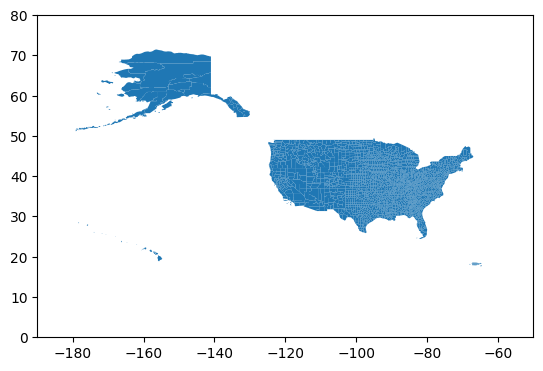

In [ ]:
plt.figure(figsize=(10, 10))
# -- Plot the data
ct16_sorted.plot()

# -- Set the x-axis limits
plt.xlim([-190, -50])
plt.ylim([0, 80])
# -- Show the plot
plt.show()

In [ ]:
# -- Merge the similar columns
cta16 = ct16_sorted.merge(df_csv, left_on = "GEOID", right_on="Geography")

In [ ]:
cta16

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Geographic Area Name
0,01,001,00161526,0500000US01001,Autauga,Autauga County,06,H1,G4020,None,33860,None,A,1539609015,25749942,+32.5322367,-086.6464395,"POLYGON ((-86.90310 32.54063, -86.90313 32.541...",0500000US01001,"Autauga County, Alabama"
1,01,003,00161527,0500000US01003,Baldwin,Baldwin County,06,H1,G4020,380,19300,None,A,4117584019,1133130502,+30.6592183,-087.7460666,"POLYGON ((-87.99068 30.55549, -87.99051 30.560...",0500000US01003,"Baldwin County, Alabama"
2,01,005,00161528,0500000US01005,Barbour,Barbour County,06,H1,G4020,None,21640,None,A,2291818680,50864677,+31.8702531,-085.4051035,"POLYGON ((-85.42982 32.04598, -85.42985 32.046...",0500000US01005,"Barbour County, Alabama"
3,01,007,00161529,0500000US01007,Bibb,Bibb County,06,H1,G4020,142,13820,None,A,1612481559,9287974,+33.0158929,-087.1271475,"POLYGON ((-87.31226 33.08622, -87.31218 33.087...",0500000US01007,"Bibb County, Alabama"
4,01,009,00161530,0500000US01009,Blount,Blount County,06,H1,G4020,142,13820,None,A,1670041875,15077458,+33.9773575,-086.5664400,"POLYGON ((-86.74919 33.99760, -86.74902 33.997...",0500000US01009,"Blount County, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72,145,01804553,0500000US72145,Vega Baja,Vega Baja Municipio,13,H1,G4020,490,41980,None,A,118766803,57805868,+18.4550267,-066.3977734,"POLYGON ((-66.44042 18.42966, -66.44044 18.429...",0500000US72145,"Vega Baja Municipio, Puerto Rico"
3216,72,147,01804554,0500000US72147,Vieques,Vieques Municipio,13,H1,G4020,None,None,None,A,131527813,552206400,+18.1254180,-065.4324740,"POLYGON ((-65.62933 18.08925, -65.63068 18.098...",0500000US72147,"Vieques Municipio, Puerto Rico"
3217,72,149,01804555,0500000US72149,Villalba,Villalba Municipio,13,H1,G4020,434,38660,None,A,92298573,3622637,+18.1307185,-066.4722435,"POLYGON ((-66.52542 18.11569, -66.52550 18.115...",0500000US72149,"Villalba Municipio, Puerto Rico"
3218,72,151,01804556,0500000US72151,Yabucoa,Yabucoa Municipio,13,H1,G4020,490,41980,None,A,143005178,72592521,+18.0598584,-065.8598713,"POLYGON ((-65.94291 18.08924, -65.94273 18.089...",0500000US72151,"Yabucoa Municipio, Puerto Rico"


In [ ]:
fig = px.choropleth_mapbox(ct16_sorted, geojson=ct16_sorted.set_index("GEOID"), locations="GEOID",
                           opacity=0.75,
                           color_continuous_scale="viridis",
                           title="United States of America, USA",
                           mapbox_style="carto-positron",
                           center={"lon": -75.15, "lat": 40.00},
                           zoom=9.5, height=600, width=900, labels={})

fig.show()


In [ ]:
# -- make an interactive choropleth for 2016
#labs = {"Deaths": "Number of Deaths"}
#fig = px.choropleth_mapbox(cta16,geojson= cta16.set_index("GEOID"), locations = "GEOID",
#                           opacity=0.75,
#                           color_continuous_scale="viridis",
#                           title="United States of America, USa",
#                           mapbox_style="carto-positron",
#                           center={"lon":-75.15, "lat":40.00},
#                           zoom=9.5, height=600, width=900, labels=labs)

#fig.show()

In [ ]:
#import plotly.express as px
#import plotly.io as pio

# Set the GEOID column as the index
#cta16 = cta16.set_index("GEOID")

# Define the labels for the color variable
#labs = {"Deaths": "Number of Deaths"}

# Create a new figure with a larger size
#fig = px.choropleth_mapbox(cta16, geojson=cta16.geometry, locations=cta16.index,
#                           opacity=0.75,
#                           color_continuous_scale="viridis",
#                           title="United States of America, USa",
#                           mapbox_style="carto-positron",
#                           center={"lon":-75.15, "lat":40.00},
#                           zoom=9.5, height=600, width=900,
#                           labels=labs)

# Show the plot
#pio.write_html(fig, file="plot.html")

In [ ]:
#import plotly.express as px

# Plot choropleth map
#fig = px.choropleth_mapbox(cta16, geojson=cta16.set_index("GEOID").geometry, locations="GEOID",
#                           opacity=0.75, color_continuous_scale="viridis",
#                           title="United States of America, USA",
#                           mapbox_style="open-street-map",
#                           center={"lon": -75.15, "lat": 40.00},
#                           zoom=9.5, height=600, width=900)
#fig.show()


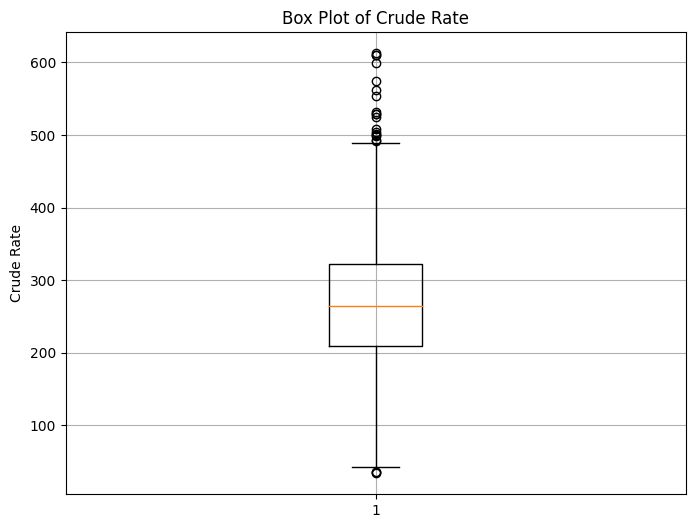

In [ ]:
# -- Create box plot for Crude Rate
plt.figure(figsize=(8, 6))
plt.boxplot(df['Crude Rate'].dropna())  # -- Drop NaN values before plotting
plt.title('Box Plot of Crude Rate')
plt.ylabel('Crude Rate')
plt.grid(True)
plt.show()


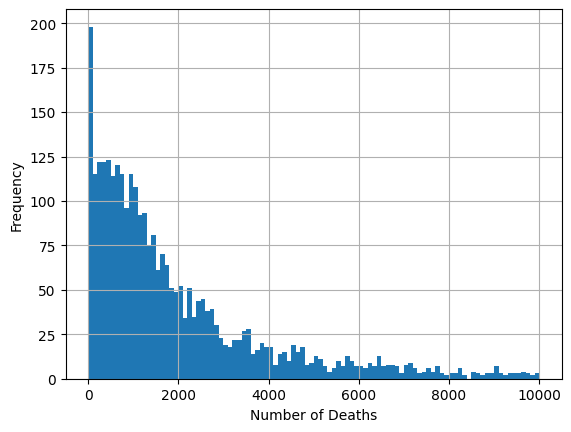

In [ ]:
# -- Plot hist for Deaths
plt.hist(df['Deaths'], bins=100, range=(0, 10000))
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

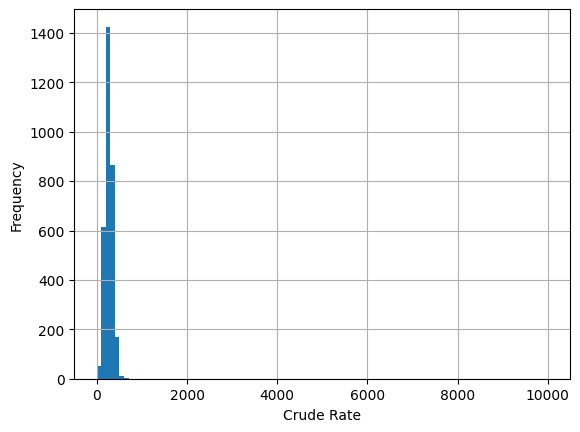

In [ ]:
# -- Replace non-numeric values with NaN
df['Crude Rate'] = pd.to_numeric(df['Crude Rate'], errors='coerce')

# -- Drop NaN values
df.dropna(subset=['Crude Rate'], inplace=True)

# -- Create histogram
plt.hist(df['Crude Rate'], bins=100, range=(0, 10000))
plt.xlabel('Crude Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-173-5185b0267458>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




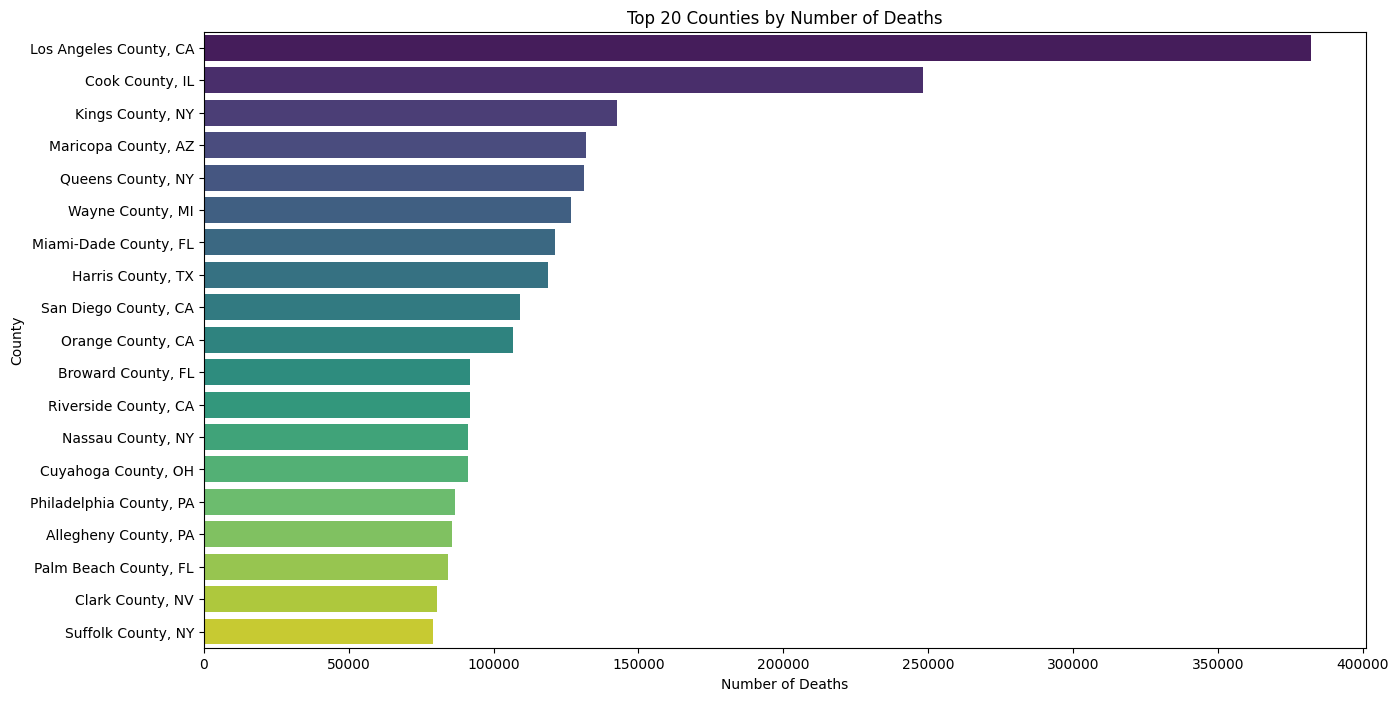

In [ ]:
# -- Bar plot for County-wise Deaths
plt.figure(figsize=(15, 8))
sns.barplot(x='Deaths', y='County', data=df.sort_values(by='Deaths', ascending=False)[:20], palette='viridis')
plt.title('Top 20 Counties by Number of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('County')
plt.show()


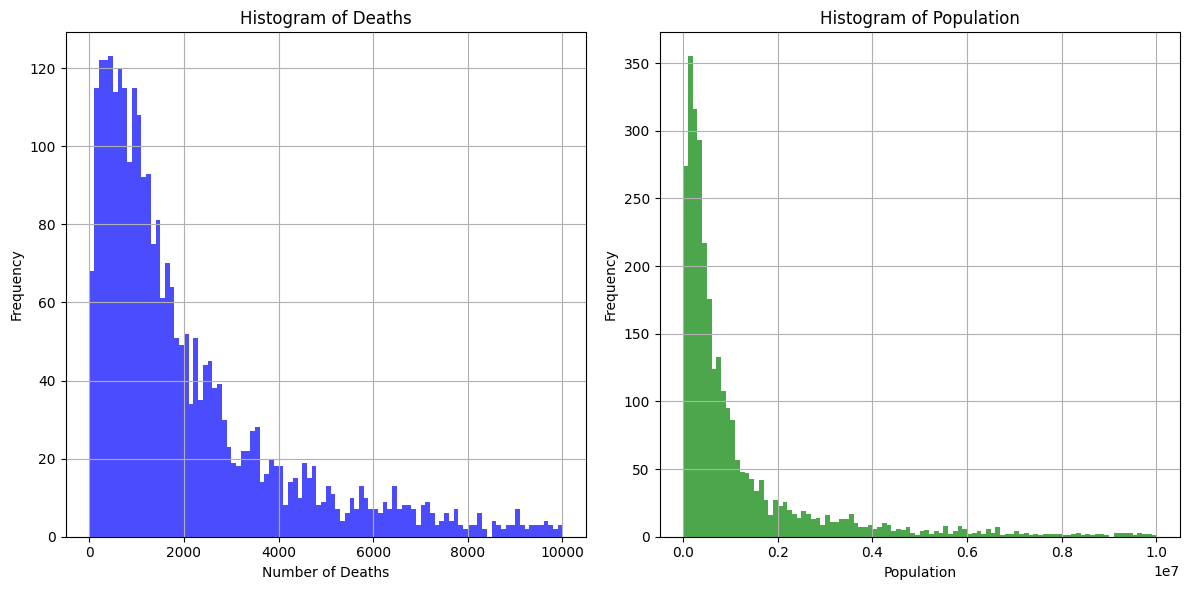

In [ ]:
# -- Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# -- Plot histogram for Deaths
axes[0].hist(df['Deaths'], bins=100, range=(0, 10000), color='blue', alpha=0.7)
axes[0].set_title('Histogram of Deaths')
axes[0].set_xlabel('Number of Deaths')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# -- Plot histogram for Population
axes[1].hist(df['Population'], bins=100, range=(0, 10000000), color='green', alpha=0.7)
axes[1].set_title('Histogram of Population')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# -- Adjust layout to prevent overlap
plt.tight_layout()

# -- Show plot
plt.show()


<ipython-input-216-eb8d1f3024bf>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



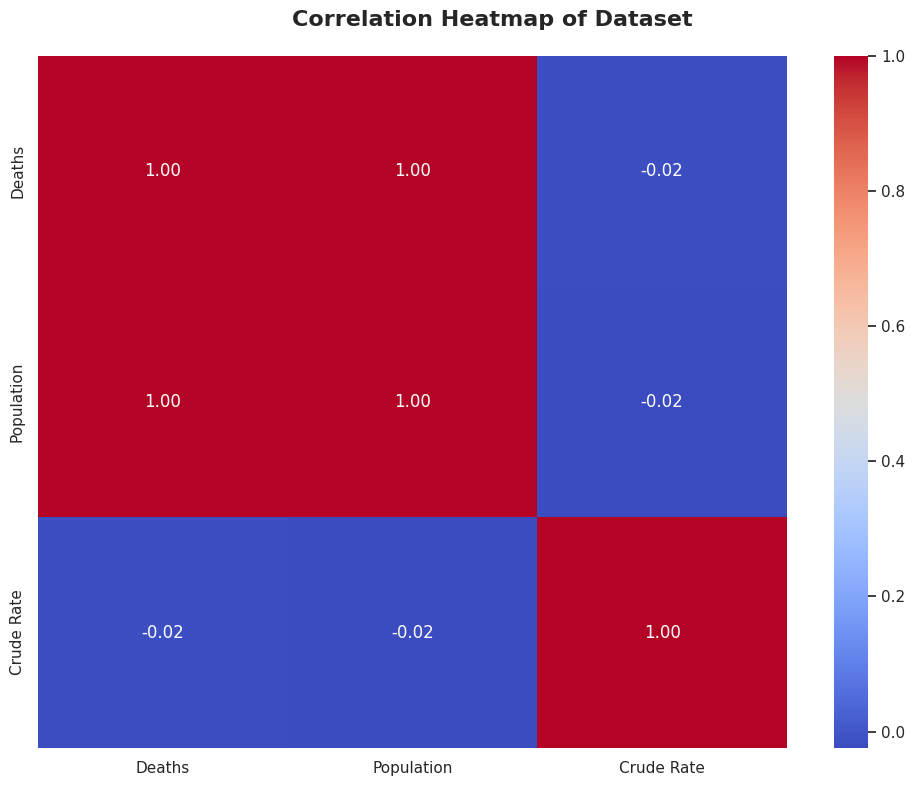

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.suptitle("Correlation Heatmap of Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()